# Algorithm for Coffee Machine
In this page we used the libraries build in the other Jupyter pages to format and analyze the code fastly

In [1]:
#import libraries
from format_csv import *
from analyze_data import *

## Format the data
First we format the data imported from mongo db

In [2]:
FILE_MONGO = "..\mongo.csv"

mongo = pd.read_csv(FILE_MONGO)
mongo = remove_NaN(mongo)
groundtruth = mongo[mongo['objectId']=="nespresso_jolmilano_groundtruth"].reset_index(drop=True)

groundtruth = col_time(groundtruth)
groundtruth = col_eventNumber(groundtruth)
print(groundtruth.head(1))
groundtruth.to_csv("groudtruth.csv")

                          objectId                 time     timestamp  \
0  nespresso_jolmilano_groundtruth  2018-07-02 11:30:30  1.530524e+12   

  eventName  eventNumber  
0    coffee         1500  


Then we format the data of power and we must add 2 hours because DB in openhab use a different time zone

In [3]:
FILE_OPENHAB = "..\openhab.csv"
openhab = pd.read_csv(FILE_OPENHAB)#Livelli di potenza
modify_hour(openhab,2,2)
openhab.head(3)
openhab.to_csv("power")

## Analyze data
Now we build the graphics and calculate the average of energy for the different events

number of coffee in groudtruth and power= 6
number of on in groudtruth and power= 4


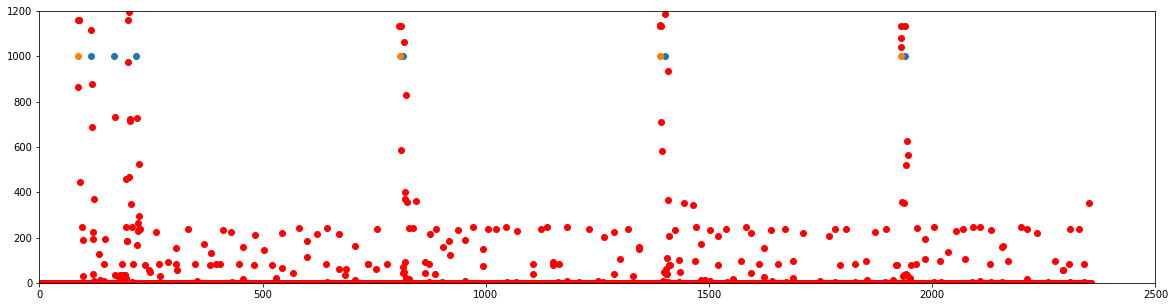

number of coffee in groudtruth and power= 6
Final Av= 249.92306064761905
number of on in groudtruth and power= 4
Final Av= 1104.3113119375
number of on in groudtruth and power= 4
Final Av= 581.4398616958333


581.4398616958333

In [4]:
power = pd.read_csv("power.csv")
groundtruth = pd.read_csv("groudtruth.csv")
sp = get_special_point(power,groundtruth,[10,10],"coffee",1000)
sp_2 = get_special_point(power,groundtruth,[10,10],"on",1000)
draw_power_graphics(power,[sp,sp_2],band=2500)
#draw_around_event(power,groundtruth,[10,10],"coffee")
average_energy(power,groundtruth,[7,8],"coffee")
average_energy(power,groundtruth,[10,10],"on")
average_energy(power,groundtruth,[-10,20],"on")

# File in Python

In [1]:
%%writefile algorithm_coffe_machine.py

#import libraries
from format_csv import *
from analyze_data import *

power = pd.read_csv("power.csv")
groundtruth = pd.read_csv("groudtruth.csv")
sp = get_special_point(power,groundtruth,[10,10],"coffee",1000)
sp_2 = get_special_point(power,groundtruth,[10,10],"on",1000)
draw_power_graphics(power,[sp,sp_2],band=2500)
#draw_around_event(power,groundtruth,[10,10],"coffee")
average_energy(power,groundtruth,[7,8],"coffee")
average_energy(power,groundtruth,[10,10],"on")
average_energy(power,groundtruth,[-10,20],"on")

Writing algorithm_coffe_machine.py
